# show fastai transforms library

In [1]:
from fastai import *
from fastai.vision import *
import PIL

from pathlib import *

import matplotlib.gridspec as gridspec
import colorcet as cc

cmGray = cc.cm.linear_grey_0_100_c0

In [191]:
def plotImageMosaic( ims, masks=None, titles=None, figSize=(12,12), imCM=None, mskCM=None ):
    fig = plt.figure(figsize=figSize)
    
    nb    = len(ims)
    nrows = int(np.sqrt(nb))
    ncols = int(math.ceil(nb/nrows))

    gs = gridspec.GridSpec(nrows, ncols=ncols, height_ratios=None if masks is None else (np.zeros(nrows)+ 2), 
                           wspace=0.01, hspace=0.01 if titles is None else 0.2)
    for i in range(nb):
        inner = gridspec.GridSpecFromSubplotSpec(1 if masks is None else 2, 1,subplot_spec=gs[i], 
                                                 wspace=0.01, hspace=0.01)
        
        ax = plt.subplot(inner[0])
        ax.axis('off')
        ax.imshow(ims[i],cmap=imCM)
        if titles is not None: ax.set_title(titles[i])
        
        if masks is not None:
            ax = plt.subplot(inner[1])
            ax.axis('off')
            ax.imshow(masks[i],cmap=mskCM)
            

In [247]:
#all probabilities are set to 1 so that is very like that the tranform are shown
def getSegmentationTransforms():
    max_zoom     = 1.
    max_rotate   = 50.
    max_brightness = 0.8
    max_contrast = 0.5
    max_warp     = 0.5
    mag_skew     = 0.5
    tfmTrain,tfmValid =[],[]
    
    #coordinate transforms
    tfmTrain.append( crop_pad(size=np.random.randint(200, 400), padding_mode='zeros' ) ) 
    tfmTrain.append( dihedral_affine() )
    tfmTrain.append( flip_lr(p=1) )
    tfmTrain.append( symmetric_warp( magnitude=(-max_warp,max_warp), p=1) )
    tfmTrain.append( perspective_warp(magnitude=(-max_warp,max_warp), p=1) )
    tfmTrain.append( rotate(degrees=(-max_rotate,max_rotate), p=1) )
    tfmTrain.append( rand_zoom(scale=(1.,max_zoom), p=1) )
    
    #tfmTrain.append( skew( direction=random.uniform(0,8), magnitude=mag_skew) )

    #pixel value transforms
    tfmTrain.append( jitter(magnitude=0.02) )
    
    tfmTrain.append( brightness(change=(0.5*(1-max_brightness), 0.5*(1+max_brightness)), p=1) )
    tfmTrain.append( contrast(scale=((1-max_contrast), 1/(1-max_contrast)), p=1) )
    
    tfmValid.append(crop_pad())
    return (tfmTrain, tfmValid)

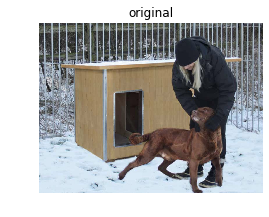

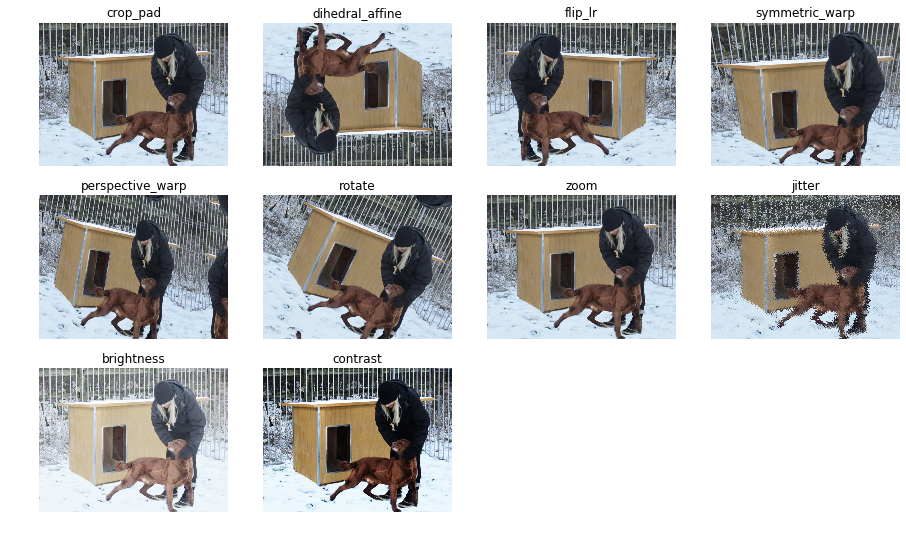

In [251]:
tfms = getSegmentationTransforms()
tfmTrain = tfms[0]
titles,imts = zip( *[ (t.__name__, image2np(apply_tfms([t],im).data) ) for t in tfmTrain ] )

im = open_image("dog_house_fence.jpg")
im.show(figsize=(4,4), title="original")
plotImageMosaic( imts, titles=titles, imCM=cmGray, figSize=(16,9))
